# Minería de Datos I – Proyecto Final  
**Autores:** Aaron Matarrita Portuguez y Yeiler Montes Rojas  
**Universidad Nacional de Costa Rica – Escuela de Informática**

---

## Dataset: *Spotify Most Streamed Songs Dataset* (Kaggle)

- **Fuente:** Kaggle – *Spotify Most Streamed Songs Dataset*  
  [Ver en Kaggle](https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs)  
- **Autor:** Muhammad Abdullah  
- **Actualización:** Hace 1 año (2024)  
- **Licencia:** [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)  
- **Frecuencia de actualización prevista:** Anual  
- **Idioma:** Inglés  
- **Tamaño:** 156.55 kB (CSV)  
- **Número de variables:** 25 columnas  

---

## Descripción general

El dataset **“Spotify Most Streamed Songs”** recopila información detallada sobre las canciones más reproducidas en **Spotify**, complementada con datos de otras plataformas de streaming como **Apple Music**, **Deezer** y **Shazam**.  

---
## 1. Comprensión del Negocio (Problema)

### Contexto
El dataset **Spotify Most Streamed Songs Dataset** (Kaggle, 2024) fue creado por **Muhammad Abdullah** mediante *web scraping* de la API de Spotify. Contiene información sobre las canciones más reproducidas en Spotify, incluyendo datos de **Apple Music**, **Deezer** y **Shazam**, además de atributos musicales como *bpm*, *energy*, *danceability* y *valence*.

---

### Definición del Problema
Predecir el éxito de una canción es un reto en la industria musical. Este proyecto busca responder:

> **¿Qué características musicales y métricas de exposición influyen más en la cantidad de reproducciones (`streams`) en Spotify?**

---

### Objetivo General
Desarrollar un modelo de **regresión** que prediga el número de reproducciones de una canción en Spotify a partir de sus atributos musicales y métricas de popularidad.

---

### Variable Objetivo
- **Target:** `streams`  
- **Tipo:** Numérica continua  
- **Problema:** Regresión  

---

### Variables Relevantes
- **Métricas de exposición:** `in_spotify_playlists`, `in_spotify_charts`, `in_apple_playlists`, `in_shazam_charts`.  
- **Atributos musicales:** `bpm`, `energy_%`, `danceability_%`, `valence_%`, `acousticness_%`.  
- **Contextuales:** `released_year`, `artist_count`.

---

### Valor del Análisis
Permite identificar los factores que impulsan la popularidad de una canción, apoyando decisiones de **marketing musical**, **recomendación algorítmica** y **estrategias creativas** para artistas y sellos discográficos.

---

In [56]:
# Importación de librerías principales

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, StackingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.style.use('seaborn-v0_8-whitegrid')

In [43]:
# Definir nombres de columnas
columnas = [
    "track_name", "artist(s)_name", "artist_count",
    "released_year", "released_month", "released_day",
    "in_spotify_playlists", "in_spotify_charts", "streams",
    "in_apple_playlists", "in_apple_charts",
    "in_deezer_playlists", "in_deezer_charts",
    "in_shazam_charts", "bpm", "key", "mode",
    "danceability_%", "valence_%", "energy_%",
    "acousticness_%", "instrumentalness_%",
    "liveness_%", "speechiness_%"
]

# Cargar dataset con nombres definidos
df = pd.read_csv("Spotify Most Streamed Songs.csv", names=columnas, header=0)

# Mostrar vista inicial
display(df.head())
print("Dimensiones del dataset:", df.shape)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,B,Major,80,89,83,31,0,8,4,Not Found
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


Dimensiones del dataset: (953, 24)


---
## 2. Comprensión de los Datos y Análisis Exploratorio de Datos (EDA)

In [44]:
# Resumen estadístico
display(df.describe().T)
print(df["streams"].value_counts())

,count,mean,std,min,25%,50%,75%,max
artist(s)_name,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
artist_count,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_year,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_month,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
released_day,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_playlists,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
streams,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_playlists,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_playlists,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
in_shazam_charts,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


streams
0      23
8      22
16     20
20     20
10     20
       ..
289     1
162     1
135     1
222     1
102     1
Name: count, Length: 234, dtype: int64


In [45]:
# Comprobar valores faltantes
print('\nValores faltantes por columna:')
print(df.isnull().sum())
# Propuesta si hubiera valores faltantes:
proposal = "Si existieran valores faltantes, se podrían imputar con la mediana (robusta a outliers). \n" + "Otra opción es eliminar filas si el porcentaje de datos faltantes es muy bajo (<5%)."
print('\nPropuesta de manejo de valores faltantes:')
print(proposal)


Valores faltantes por columna:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts        50
in_shazam_charts         0
bpm                     95
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Propuesta de manejo de valores faltantes:
Si existieran valores faltantes, se podrían imputar con la mediana (robusta a outliers). 
Otra opción es eliminar filas si el porcentaje de datos faltantes es muy bajo (<5%).


In [46]:
# Separar variables numéricas y categóricas correctamente
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

print("Variables numéricas:", list(df_num.columns))
print("Variables categóricas:", list(df_cat.columns))

# Estadísticas descriptivas
display(df_num.describe().T.style.background_gradient(cmap='Blues').format(precision=2))

Variables numéricas: ['artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_deezer_playlists', 'in_shazam_charts', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%']
Variables categóricas: ['track_name', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'key', 'speechiness_%']


,count,mean,std,min,25%,50%,75%,max
artist(s)_name,953.00,1.56,0.89,1.00,1.00,1.00,2.00,8.00
artist_count,953.00,2018.24,11.12,1930.00,2020.00,2022.00,2022.00,2023.00
released_year,953.00,6.03,3.57,1.00,3.00,6.00,9.00,12.00
released_month,953.00,13.93,9.20,1.00,6.00,13.00,22.00,31.00
released_day,953.00,5200.12,7897.61,31.00,875.00,2224.00,5542.00,52898.00
in_spotify_playlists,953.00,12.01,19.58,0.00,0.00,3.00,16.00,147.00
streams,953.00,67.81,86.44,0.00,13.00,34.00,88.00,672.00
in_apple_playlists,953.00,51.91,50.63,0.00,7.00,38.00,87.00,275.00
in_deezer_playlists,953.00,2.67,6.04,0.00,0.00,0.00,2.00,58.00
in_shazam_charts,953.00,122.54,28.06,65.00,100.00,121.00,140.00,206.00


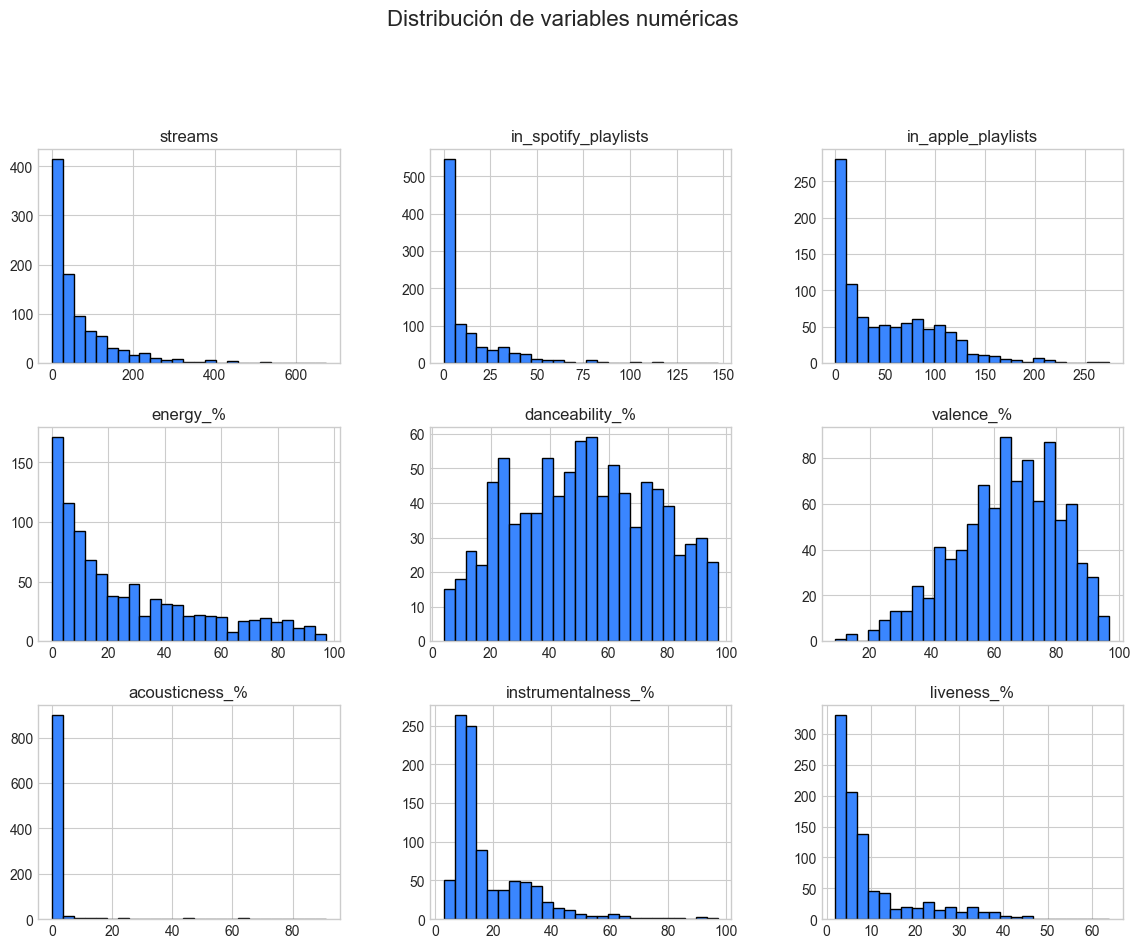

In [47]:
# Histogramás (distribución de variables númericas)

# Solo para las numéricas principales (evitar ruido)
cols_plot = [
    'streams', 'in_spotify_playlists', 'in_apple_playlists',
    'bpm', 'energy_%', 'danceability_%', 'valence_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%'
]

df[cols_plot].hist(figsize=(14,10), bins=25, color='#3A86FF', edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16, y=1.02)
plt.show()


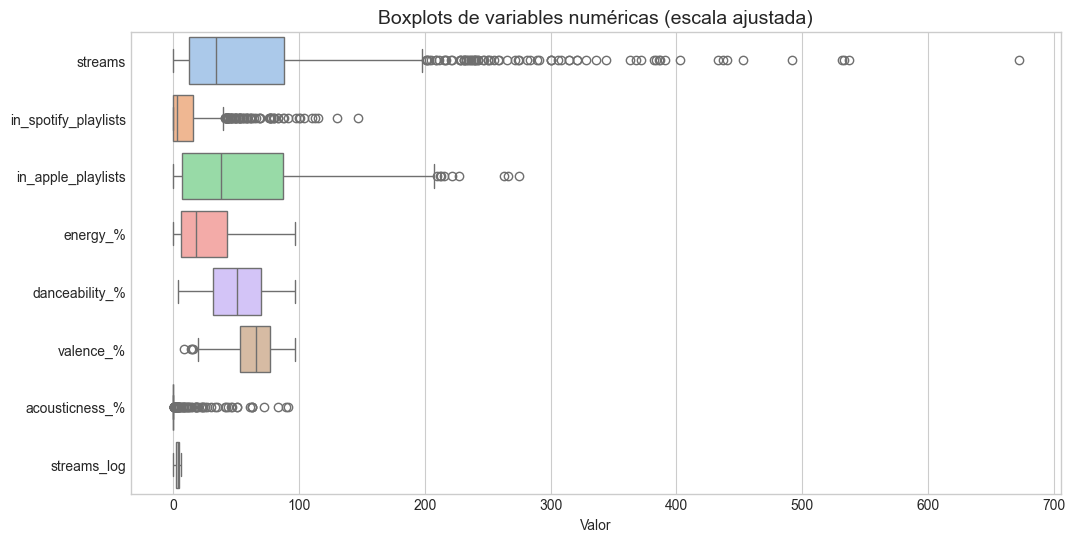

In [48]:
# Boxplots (detección de outliers)

df_box = df[['streams', 'in_spotify_playlists', 'in_apple_playlists', 'energy_%', 'danceability_%', 'valence_%', 'acousticness_%']].copy()

df_box['streams_log'] = np.log1p(df_box['streams'])

plt.figure(figsize=(12,6))
sns.boxplot(data=df_box, orient='h', palette='pastel')
plt.title("Boxplots de variables numéricas (escala ajustada)", fontsize=14)
plt.xlabel("Valor")
plt.show()


In [49]:
# Gráficos de barras (variables categóricas)




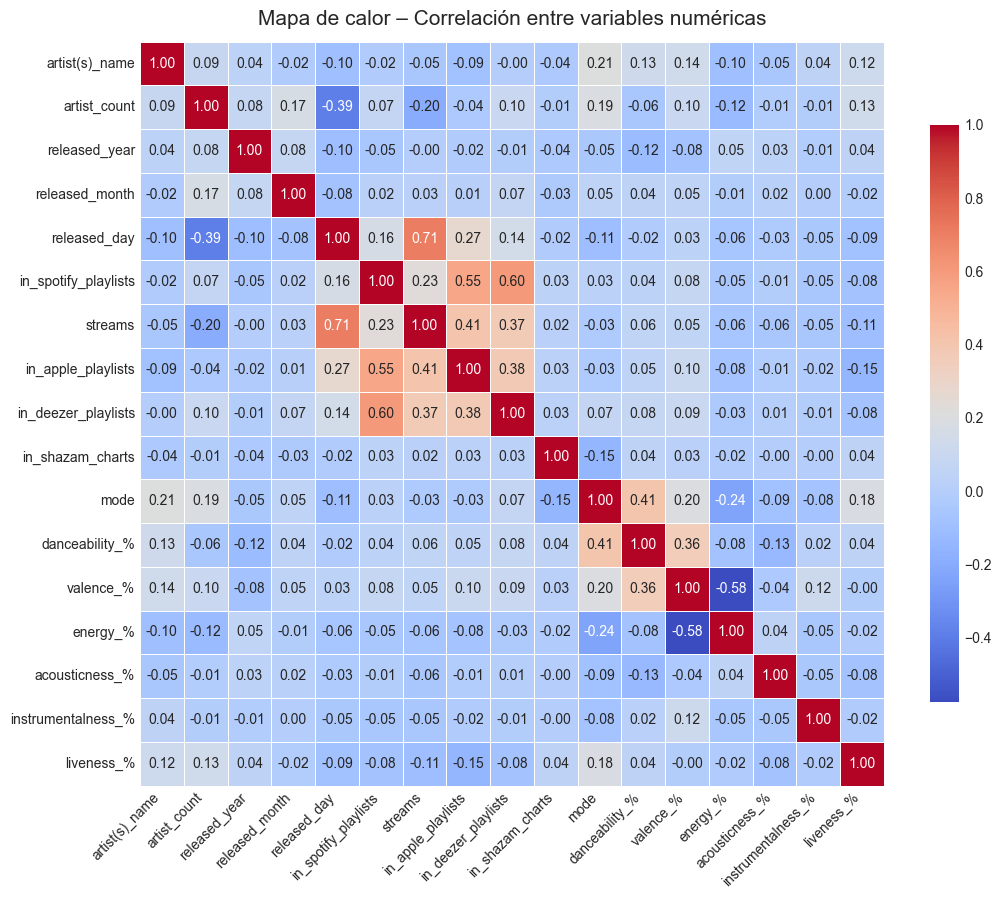

Correlaciones más fuertes con 'streams':

streams                 1.000000
released_day            0.708277
in_apple_playlists      0.414523
in_deezer_playlists     0.369032
in_spotify_playlists    0.233354
danceability_%          0.057075
valence_%               0.052615
released_month          0.026410
in_shazam_charts        0.023725
released_year          -0.000164
Name: streams, dtype: float64


In [50]:
# Mapa de calor (correlación)

corr = df_num.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True, 
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .75}
)

plt.title("Mapa de calor – Correlación entre variables numéricas", fontsize=15, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Mostrar correlaciones más fuertes con 'streams
corr_streams = corr['streams'].sort_values(ascending=False)
print("Correlaciones más fuertes con 'streams':\n")
print(corr_streams.head(10))


---
## 3. Preprocesamiento y Transformación de Datos

In [51]:
# Revisión de valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Análisis
print("\nVariables con datos faltantes:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Decisión de limpieza
print("\nEstrategia de limpieza:")
print("1. Eliminar filas con valores faltantes en 'bpm' y 'in_deezer_charts' (menos del 10% del total).")
print("2. Reiniciar índices después del filtrado.\n")

# Aplicar limpieza
print("Filas antes de limpieza:", df.shape[0])
df = df.dropna(subset=['bpm', 'in_deezer_charts']).reset_index(drop=True)
print("Filas después de limpieza:", df.shape[0])


Valores faltantes por columna:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts        50
in_shazam_charts         0
bpm                     95
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Variables con datos faltantes:
in_deezer_charts    50
bpm                 95
dtype: int64

Estrategia de limpieza:
1. Eliminar filas con valores faltantes en 'bpm' y 'in_deezer_charts' (menos del 10% del total).
2. Reiniciar índices después del filtrado.

Filas antes de limpieza: 953
Filas después de limpi

### Limpieza de Datos

Se realizó la revisión de valores faltantes en el dataset, se encontro la ausencia de datos en las variables:

- **`in_deezer_charts`** → 50 valores faltantes.  
- **`bpm`** → 95 valores faltantes.

El porcentaje de datos faltantes es **bajo (<10%)**, por lo que se decidió **eliminar las filas que los contienen**, ya que su eliminación no afecta significativamente la representación del conjunto de datos.  

Después de aplicar la limpieza, el número de filas del dataset se redujo, conservando únicamente los registros con información completa.

In [53]:
# Definir preprocesamiento (ColumnTransformer)

# Definir columnas categóricas y numéricas
cat_cols = ['mode']  # (Mayor / Minor)
num_cols = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists',
    'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Pipelines para categóricas y numéricas

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer que combine ambos
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

print("Preprocesador definido correctamente.")

Preprocesador definido correctamente.


In [54]:
# Definir X e y
target_col = 'streams'  # número total de reproducciones

# Separar variables predictoras y objetivo
X = df.drop(columns=[target_col])
y = df[target_col]

print("Variables definidas correctamente.")
print("X shape:", X.shape)
print("y shape:", y.shape)

Variables definidas correctamente.
X shape: (817, 23)
y shape: (817,)


In [55]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (653, 23)
Test shape: (164, 23)


### Preprocesamiento de Variables

Para preparar los datos antes del modelado, se definieron las transformaciones necesarias para variables numéricas y categóricas:

- **Variables numéricas**: se aplicó imputación de valores faltantes mediante la mediana (robusta a outliers) y posterior **escalamiento estandarizado (StandardScaler)**.  
- **Variables categóricas**: se realizó imputación con la moda y codificación mediante **OneHotEncoder**, creando variables binarias para cada categoría.  
- Se empleó un **ColumnTransformer** para aplicar ambos procesos de forma simultánea y consistente.  
- Finalmente, se separaron las variables predictoras (**X**) y la variable objetivo (**streams**) y se realizó una división **80/20 (train/test)** para garantizar una evaluación justa del modelo.

---
## 4. Diseño y Desarrollo del Modelo Predictivo

In [ ]:
# Función auxiliar para crear pipelines
def make_pipeline(model):
    return Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

# Modelos base
lr = make_pipeline(LinearRegression())
rf = make_pipeline(RandomForestRegressor(n_estimators=200, random_state=42))
svr = make_pipeline(SVR(kernel='rbf'))

# Diccionario de modelos base
base_models = [
    ('lr', lr),
    ('rf', rf),
    ('svr', svr)
]

In [59]:
# Modelos de Consenso

# Voting Regressor (promedio de predicciones)
voting = VotingRegressor(estimators=base_models)

# Stacking Regressor (meta-modelo combina predicciones)
stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5,
    passthrough=False
)

# Diccionario general con todos los modelos
models = {
    'Regresión Lineal': lr,
    'Random Forest': rf,
    'SVR': svr,
    'Voting Regressor': voting,
    'Stacking Regressor': stacking
}